## Randomforest

In [311]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [312]:
df = pd.read_csv(r'D:\mehrs\VSCodeProjects\prediction\DRT_models\XGBoost\processed_DRT_data.csv')

In [ ]:
df_tatamotors = df.loc[
(df['BH_SYMBOL'] == 'TATAMOTORS') ].copy()


In [ ]:

df_tatamotors['BH_TIMESTAMP']=pd.to_datetime(df_tatamotors['BH_TIMESTAMP'])

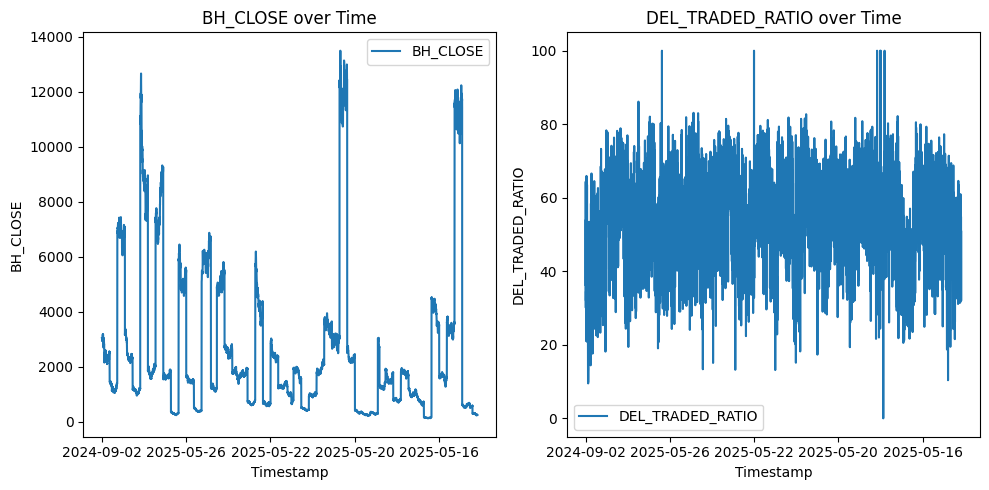

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_tatamotors.plot(x='BH_TIMESTAMP', y='BH_CLOSE', ax=axes[0], title='BH_CLOSE over Time')
axes[0].set_xlabel('Timestamp')
axes[0].set_ylabel('BH_CLOSE')

df_tatamotors.plot(x='BH_TIMESTAMP', y='DEL_TRADED_RATIO', ax=axes[1], title='DEL_TRADED_RATIO over Time')
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('DEL_TRADED_RATIO')

plt.tight_layout()
plt.show()


In [317]:
df_tatamotors['BH_TOMMOROW'] = df_tatamotors['BH_CLOSE'].shift(-1)
df_tatamotors['TARGET']=(df_tatamotors['BH_TOMMOROW'] > df_tatamotors['BH_CLOSE']).astype(int)


In [372]:
# Model Training 

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=160,
    min_samples_split=5,
    class_weight='balanced',
    random_state=1
)


In [383]:
from sklearn.model_selection import TimeSeriesSplit

predictors = [
    'BH_OPEN', 'BH_HIGH', 'BH_LOW', 'BH_CLOSE', 'BH_LAST', 'BH_PREVCLOSE',
    'BH_TOTTRDQTY', 'BH_TOTTRDVAL', 'BH_TOTALTRADES','DEL_QTY',
    'TRADED_QTY', 'DEL_TRADED_RATIO', 'Close_Price_Lag1', 'Close_Price_Lag3',
    'Close_Price_Lag5', 'Close_Price_Lag7', 'Close_Price_Lag10', 'Price_Change_Daily',
    'Price_Change_3Days', 'Price_Change_5Days', 'Price_Change_7Days', 'Price_Change_10Days',
    'Returns_Daily', 'Returns_3Days', 'Returns_5Days', 'Returns_7Days', 'Returns_10Days',
    'Volatility_3Days', 'Volatility_5Days', 'Volatility_7Days', 'SMA_3', 'SMA_5', 'SMA_7',
    'DRT', 'DRT_Change_Daily', 'DRT_Change_3Days', 'DRT_Change_5Days', 'DRT_Change_7Days',
    'DRT_Spike_3', 'DRT_Spike_5', 'DRT_Spike_7', 'Del_Volume', 'DRT_Volatility_3',
    'DRT_Volatility_5', 'DRT_MA3', 'DRT_MA5', 'DRT_MA7'
]

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(df_tatamotors):
    train, test = df_tatamotors.iloc[train_index], df_tatamotors.iloc[test_index]
    model.fit(train[predictors], train['TARGET'])
    preds = model.predict(test[predictors])

In [384]:
preds = pd.Series(preds, index=test.index)

In [385]:
# Set zero_division to 0 to handle cases with no predicted samples
from sklearn.metrics import precision_score


precision = precision_score(test['TARGET'], preds)
print("Precision:", precision)

Precision: 0.5789473684210527


<Axes: >

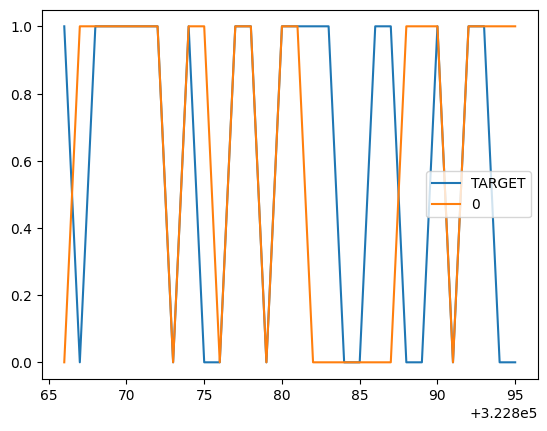

In [376]:
combined = pd.concat([test['TARGET'],preds],axis=1)
combined.plot()

In [310]:
# backtesting system
